In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\BARANLAPTOP\AppData\Local\Temp\ipykernel_2808\1577805945.py:2: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("E:\دانشگاه\کارگاه هوش\جلسه 1 - Classification and Regression\penguins_size.csv")


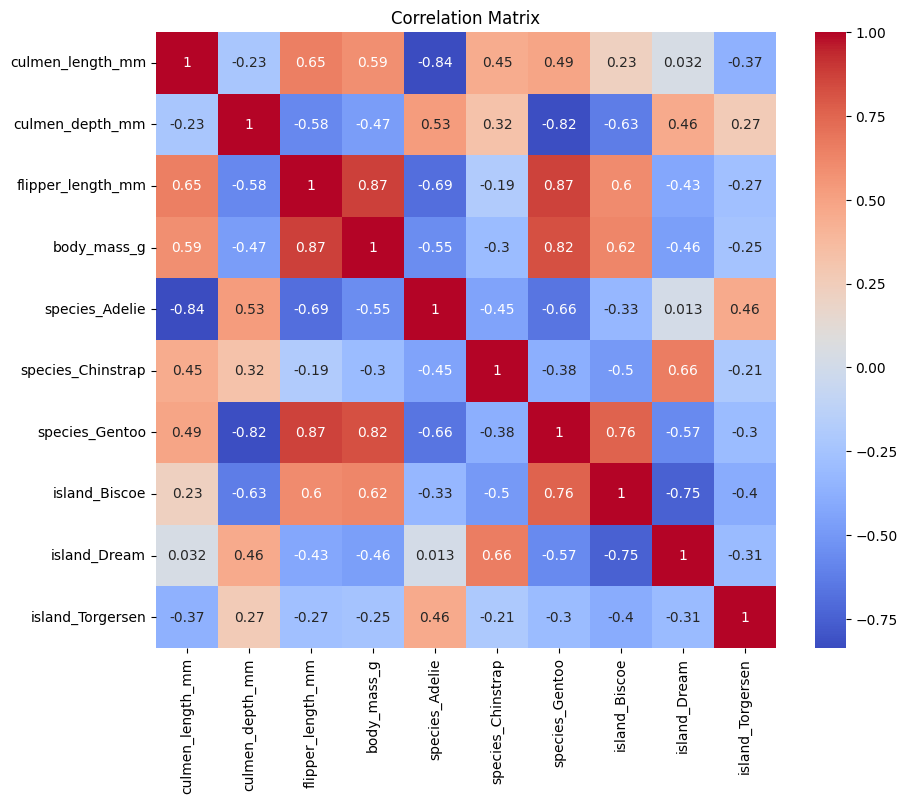

In [24]:
# Load dataset
data = pd.read_csv("E:\دانشگاه\کارگاه هوش\جلسه 1 - Classification and Regression\penguins_size.csv")

# Drop NA entries in the 'sex' column
data = data.dropna(subset=['sex'])

# Replace missing values with mean for numerical columns
imputer = SimpleImputer(strategy="mean")
num_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
data[num_features] = imputer.fit_transform(data[num_features])

# One-hot encode categorical columns
cat_features = ["species", "island"]
data = pd.get_dummies(data, columns=cat_features)

# Calculate correlation matrix (excluding target feature "sex")
correlation_matrix = data.drop("sex", axis=1).corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select features based on correlation with target
threshold = 0.1
selected_features = correlation_matrix.abs().max(axis=1) > threshold

# Get selected feature names
selected_feature_names = selected_features.index[selected_features].tolist()

# Define numerical features
num_features = selected_feature_names

# Define preprocessing steps for numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features)
    ])

# Apply preprocessing to the whole dataset
X = data.drop("sex", axis=1)  # Features (excluding target "sex")
y = data["sex"]  # Target "sex"
X_processed = preprocessor.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [25]:
# Define classifiers
classifiers = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(n_estimators=5),
    "NB": GaussianNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = clf.predict(X_test)
    test_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "train_time": train_time,
        "test_time": test_time,
        "accuracy": accuracy
    }

# Print results
print("Classifier\t| Train Time (s)\t| Test Time (s)\t| Accuracy")
print("-" * 55)
for name, res in results.items():
    print(f"{name}\t| {res['train_time']:.6f}\t\t| {res['test_time']:.6f}\t\t| {res['accuracy']:.4f}")


Classifier	| Train Time (s)	| Test Time (s)	| Accuracy
-------------------------------------------------------
SVM	| 0.011994		| 0.002997		| 0.8955
KNN	| 0.007003		| 0.009005		| 0.8955
RF	| 0.015970		| 0.002001		| 0.9104
NB	| 0.003000		| 0.000975		| 0.7164


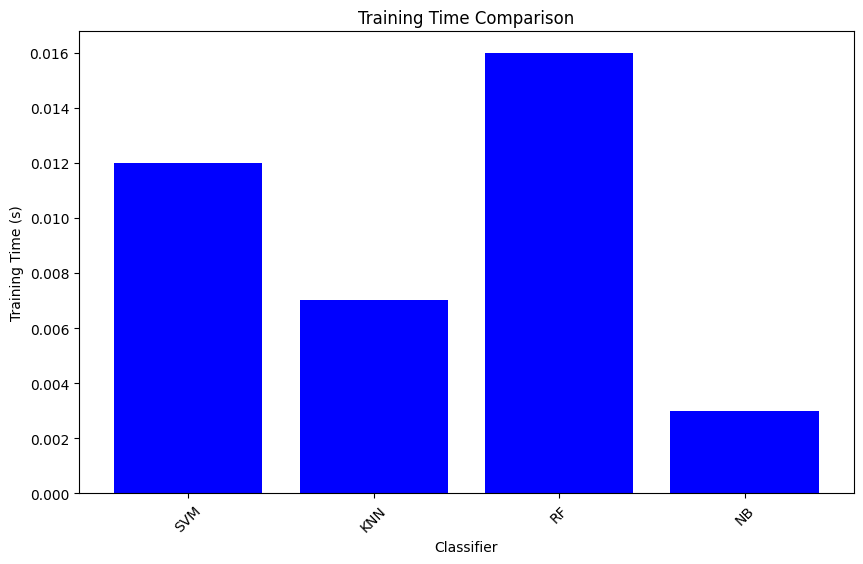

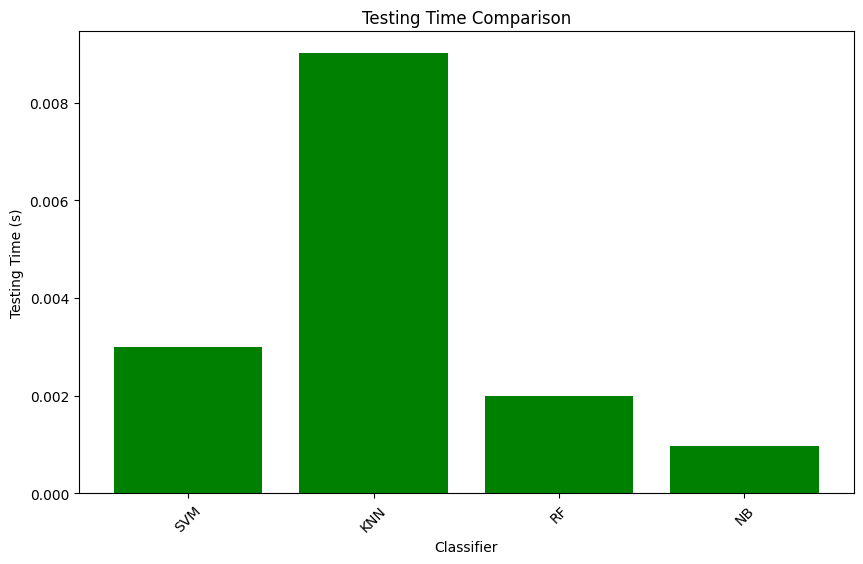

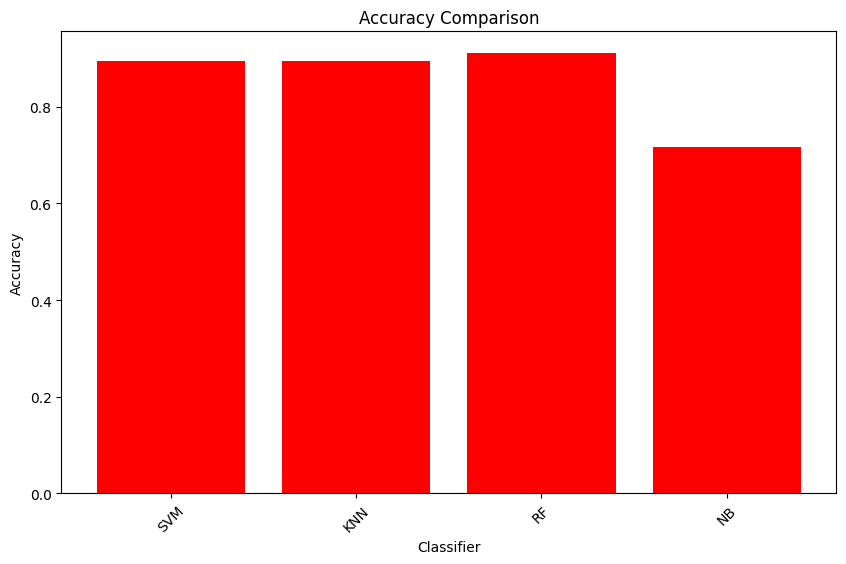

In [26]:
# Extract results
classifiers_names = list(results.keys())
train_times = [results[name]["train_time"] for name in classifiers_names]
test_times = [results[name]["test_time"] for name in classifiers_names]
accuracies = [results[name]["accuracy"] for name in classifiers_names]

# Plot training time
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, train_times, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot testing time
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, test_times, color='green')
plt.xlabel('Classifier')
plt.ylabel('Testing Time (s)')
plt.title('Testing Time Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracies, color='red')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()
